In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_decision_regions

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [4]:
print('Labels counts in y:', np.bincount(y))

Labels counts in y: [50 50 50]


In [5]:
print('Labels counts in y_train:', np.bincount(y_train))

Labels counts in y_train: [35 35 35]


In [6]:
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y_test: [15 15 15]


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1, multi_class='auto', solver='lbfgs')
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
print('Accuracy: %.2f' % lr.score(X_test_std, y_test))

Accuracy: 0.98


In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

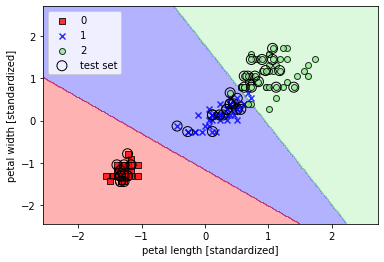

In [11]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [15]:
probs = lr.predict_proba(X_test_std[:3, :])

In [16]:
probs.sum(axis=1)

array([1., 1., 1.])

In [17]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [21]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])